In [3]:
import tensorflow as tf

import numpy as np 
# 비정형 & 입체적인 데이터 구조
import matplotlib.pyplot as plt

In [25]:
!pip install -U tensorflow_datasets

     ---------------------------------------- 4.2/4.2 MB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 86.9/86.9 KB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 48.8/48.8 KB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 212.3/212.3 KB 4.3 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21498 sha256=f1d709be87264ef54596aadbc3d9c3ffff87b0866a4572d713aa8ef9f5f6bc69
  Stored in directory: c:\users\82103\appdata\local\pip\cache\wheels\29\93\c6\762e359f8cb6a5b69c72235d798804cae523bbe41c2aa8333d
Successfully built promise
  Attempting uninstall: zipp
    Found existing installation: zipp 0.6.0
    Uninstalling zipp-0.6.0:
      Successfully uninstalled zipp-0.6.0


## 2. Dataset

In [4]:
mnist=tf.keras.datasets.mnist

In [5]:
(X_train, y_train),(X_test,y_test)=mnist.load_data()

    mnist의 dataset자체  
https://sdc-james.gitbook.io/onebook/4.-and/5.1./5.1.3.-mnist-dataset

In [6]:
len(X_train[0,0])

28

In [7]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [8]:
28 * 28

784

In [9]:
X_train[:1]

# 단색 

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
           0,   0,   0

In [10]:
y_train[:1]

array([5], dtype=uint8)

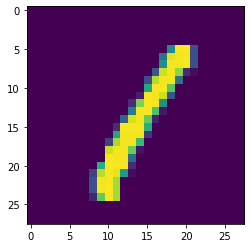

In [11]:
plt.imshow(X_train[3])

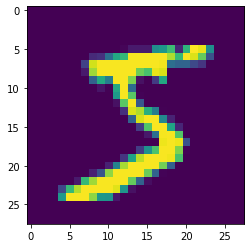

In [12]:
plt.imshow(X_train[0])

## 3. Preprocssing

In [13]:
X_train_norm = (X_train - X_train.min()) / (X_train.max() - X_train.min())

In [14]:
X_test_norm=(X_test)/X_test.max()

## 4. Modeling : CNN

In [15]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu',
                          padding="SAME", input_shape=(28,28,1)),
    #보통 필터는 8의 배수로 
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    # 넓히고
    tf.keras.layers.Dense(10,activation='softmax')
            #110개로 다시 압축
])

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 위에서 만든 틀을 최적화시키기. 반복해서 

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62730     
Total params: 63,562
Trainable params: 63,562
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
model.fit(X_train_norm, y_train,
         epochs=3)

ValueError: Error when checking input: expected conv2d_input to have 4 dimensions, but got array with shape (60000, 28, 28)

In [20]:
pred=model.predict(X_test)
# 학습한 적이 없는 데이터 
pred

ValueError: Error when checking input: expected conv2d_input to have 4 dimensions, but got array with shape (10000, 28, 28)

## Image 